In [223]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

# Fonctions

In [224]:
def initialisation(n0, n1, n2):

    W1 = np.random.randn(n1, n0)
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1)
    b2 = np.zeros((n2, 1))

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [225]:
def forward_propagation(X, parametres):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

In [226]:
def back_propagation(X, y, parametres, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients

In [227]:
def update(gradients, parametres, learning_rate):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [228]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  A2 = activations['A2']
  return A2 >= 0.5

In [382]:
def neural_network(X, y, n1=32, learning_rate = 0.1, n_iter = 1000):

    # initialisation parametres
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    history = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        A2 = activations['A2']

        # Plot courbe d'apprentissage
        train_loss.append(log_loss(y.flatten(), A2.flatten(),labels=[0, 1]))
        y_pred = predict(X, parametres)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))
        
        history.append([parametres.copy(), train_loss, train_acc, i])

        # mise a jour
        gradients = back_propagation(X, y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)

    
    lim = X.max()
    h = 100
    X1 = np.linspace(-lim, lim, h)
    X2 = np.linspace(-lim, lim, h)
    X11, X22 = np.meshgrid (X1, X2)
    X_final = np.c_[X11.ravel(), X22.ravel()].T

    def frontiere(X, parametres):
        activations = forward_propagation(X, parametres)
        A2 = activations['A2']
        return A2 

    A = frontiere(X_final, parametres)
    A = A.reshape(100,100)
     
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    
    plt.subplot(1,3,3)
    plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
    plt.contour(X11, X22, A, levels=[0.5])
    plt.show()

    return parametres

# Dataset

dimensions de X: (2, 100)
dimensions de y: (1, 100)


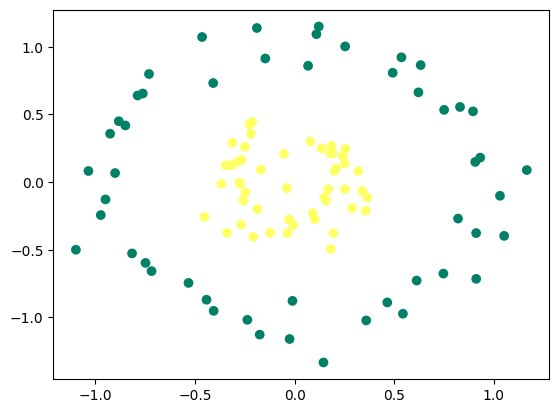

In [342]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 1716.82it/s]


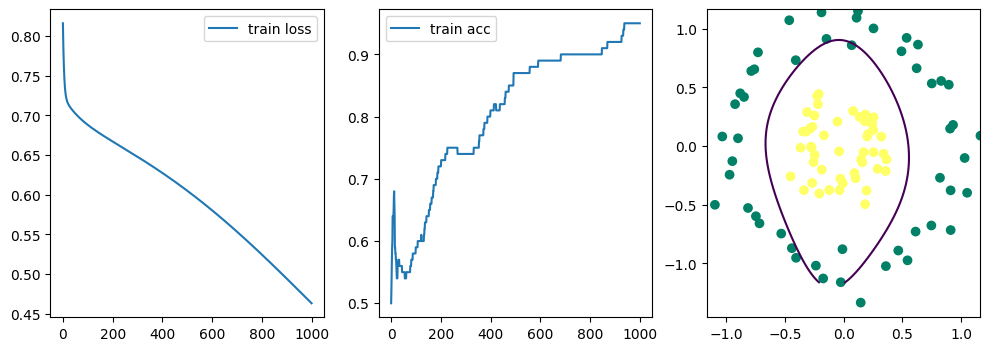

{'W1': array([[ 3.42170919, -0.0392458 ],
        [ 1.30116933,  2.73578264],
        [ 2.20082734, -1.00640362],
        [ 0.72655066, -0.41425649],
        [ 0.39233148,  0.66393588],
        [-0.31500101,  2.37412917],
        [ 0.70539569,  0.0831067 ],
        [ 0.31099161,  0.23008982],
        [ 2.31948511,  0.16659139],
        [ 0.58648171, -0.60840554]]),
 'b1': array([[-1.81112811e+00],
        [ 1.36667486e+00],
        [ 8.42405010e-01],
        [-1.12407888e-01],
        [-7.24916500e-02],
        [-1.25577936e+00],
        [ 9.89775935e-04],
        [ 8.87457242e-02],
        [ 9.67295269e-01],
        [ 6.22611529e-02]]),
 'W2': array([[-3.89923061,  1.68563175,  0.96773316, -1.28113567,  1.76626373,
         -2.48250136, -0.41964662, -0.70535394,  1.68378072,  0.73518873]]),
 'b2': array([[-1.37877796]])}

In [385]:
neural_network(X, y, n1=10)